In [54]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn import neighbors, model_selection
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn import datasets, neighbors, model_selection
from collections import Counter
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import make_classification
from sklearn import linear_model
from sklearn.datasets import load_digits, load_diabetes, load_diabetes, load_iris
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import confusion_matrix
import seaborn as sns
from scipy.stats import binom
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier




Q1

In [23]:
# Fonction pour calculer la probabilité de prédiction correcte pour le modèle agrégé
def corrected_aggregated_prediction_probability(p, L):
    majority = L // 2 + 1 if L % 2 == 0 else (L + 1) // 2
    return sum(binom.pmf(k, L, p) for k in range(majority, L + 1))

# Exemple d'utilisation
p = 0.7  # probabilité de prédiction correcte pour un classifieur individuel
L_values = [1, 5, 10, 50, 100]  # différents nombres de classifieurs
probabilities = [corrected_aggregated_prediction_probability(p, L) for L in L_values]
#print(probabilities)


# plot the probability density
fig, ax = plt.subplots(1, 1)
ax.plot(x, pmf, 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, pmf, colors='b', lw=5, alpha=0.5)
plt.title("Density for the number of correct learners")
plt.xlabel("Number of correct learners")
plt.ylabel("Probability")
plt.show()

[0.7, 0.8369199999999998, 0.8497316674000001, 0.9976304521510172, 0.9999779390866731]


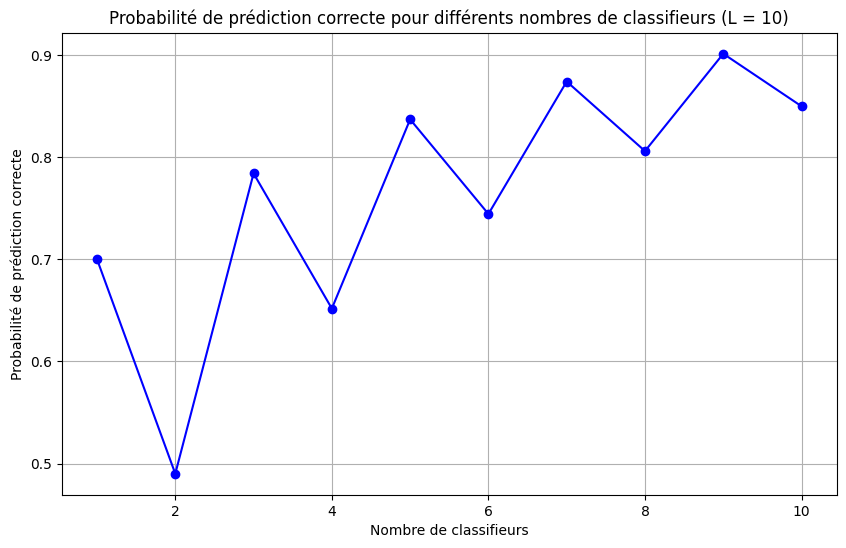

In [24]:
# Création du graphique pour L = 10
L = 10
x = np.arange(1, L+1)
y = [corrected_aggregated_prediction_probability(p, i) for i in x]

plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', color='b')
plt.title('Probabilité de prédiction correcte pour différents nombres de classifieurs (L = 10)')
plt.xlabel('Nombre de classifieurs')
plt.ylabel('Probabilité de prédiction correcte')
plt.grid(True)
plt.show()


Q2

In [30]:
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 *rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 1 *(0.5 -rng.rand(16))
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]

In [31]:

# Colors
c_tree = "deepskyblue"
c_bagging = "mediumvioletred"
c_bagging_bt = "limegreen"

c_rf = "palevioletred"
c_svm = "mediumseagreen"
c_dt = "limegreen"

c_train = "teal"
c_test = "darkslateblue"

c_train_adaboost = "turquoise"
c_test_adaboost = "lightsteelblue"

lw = 2.5 # linewidth in all graphics
sc = 50 # Scatter size
alp=0.7

In [32]:
def plot_tree_bag(X=X, y=y, X_test=X_test, L=10, tree_max_depth=1, bagging_max_depth=10):
    # define the regressor by bagging stumps
    tree = DecisionTreeRegressor(max_depth=tree_max_depth)
    tree.fit(X, y)

    bagging = BaggingRegressor(base_estimator=tree, n_estimators=L, 
                               max_samples=bagging_max_depth)
    
    bagging.fit(X, y)

    # Predict
    y_tree = tree.predict(X_test)
    y_bagging = bagging.predict(X_test)
    # Plot the results
    plt.figure(figsize=(15, 9))
    plt.plot(X, y, 'o', c="k", label="data")
    # add plots for Bagging/Tree
    plt.plot(X_test, y_tree, marker='.', color=c_tree, alpha=alp, label="Tree (tree_max_depth=%d)"%tree_max_depth, linewidth=lw)
    plt.plot(X_test, y_bagging, marker='.', color=c_bagging_bt, alpha=alp, label="Bagging (tree_max_depth=%d)"%tree_max_depth, linewidth=lw)

    plt.title("Decision Tree Regression")
    plt.legend(loc=1, numpoints=1)
    plt.show()

/Users/salimatoutraore/opt/anaconda3/envs/mon_environnement/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


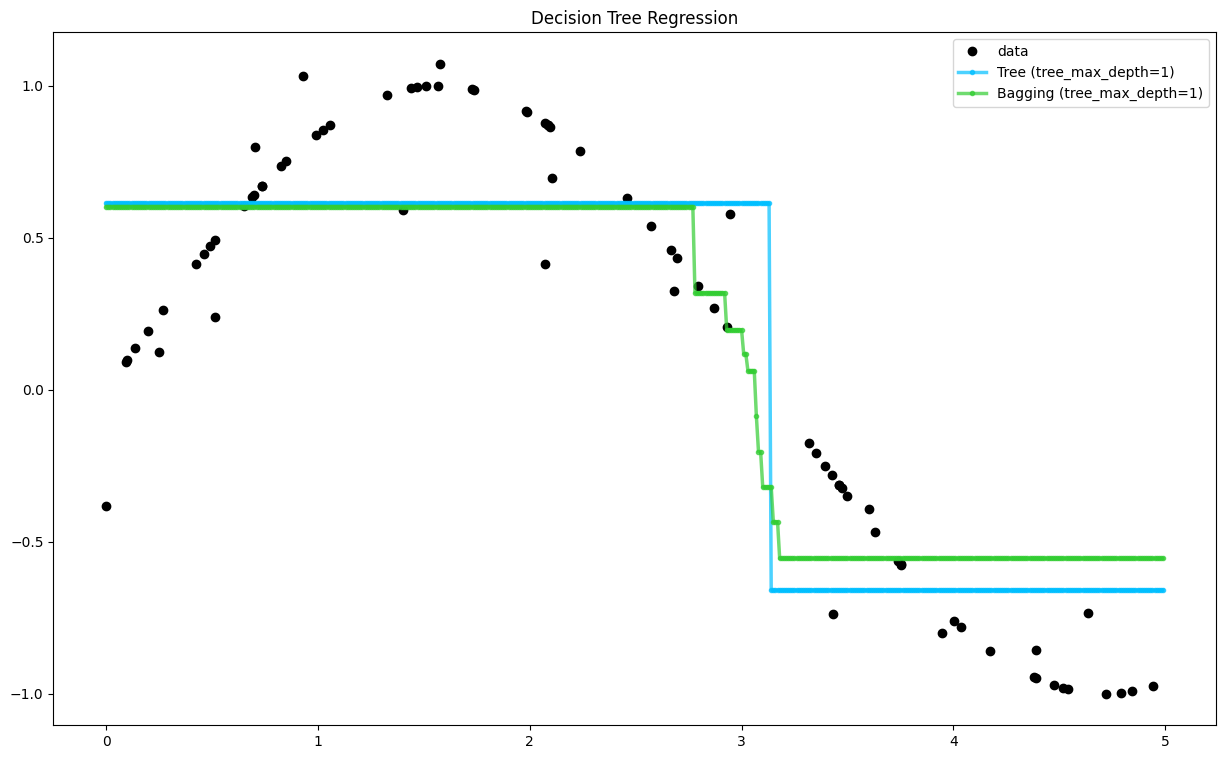

In [33]:
plot_tree_bag(X=X, y=y, X_test=X_test, L=10, tree_max_depth=1, bagging_max_depth=10)

/Users/salimatoutraore/opt/anaconda3/envs/mon_environnement/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/salimatoutraore/opt/anaconda3/envs/mon_environnement/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/salimatoutraore/opt/anaconda3/envs/mon_environnement/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/salimatoutraore/opt/anaconda3/envs/mon_environnement/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/salimatoutraore/opt/anaconda3/envs/mo

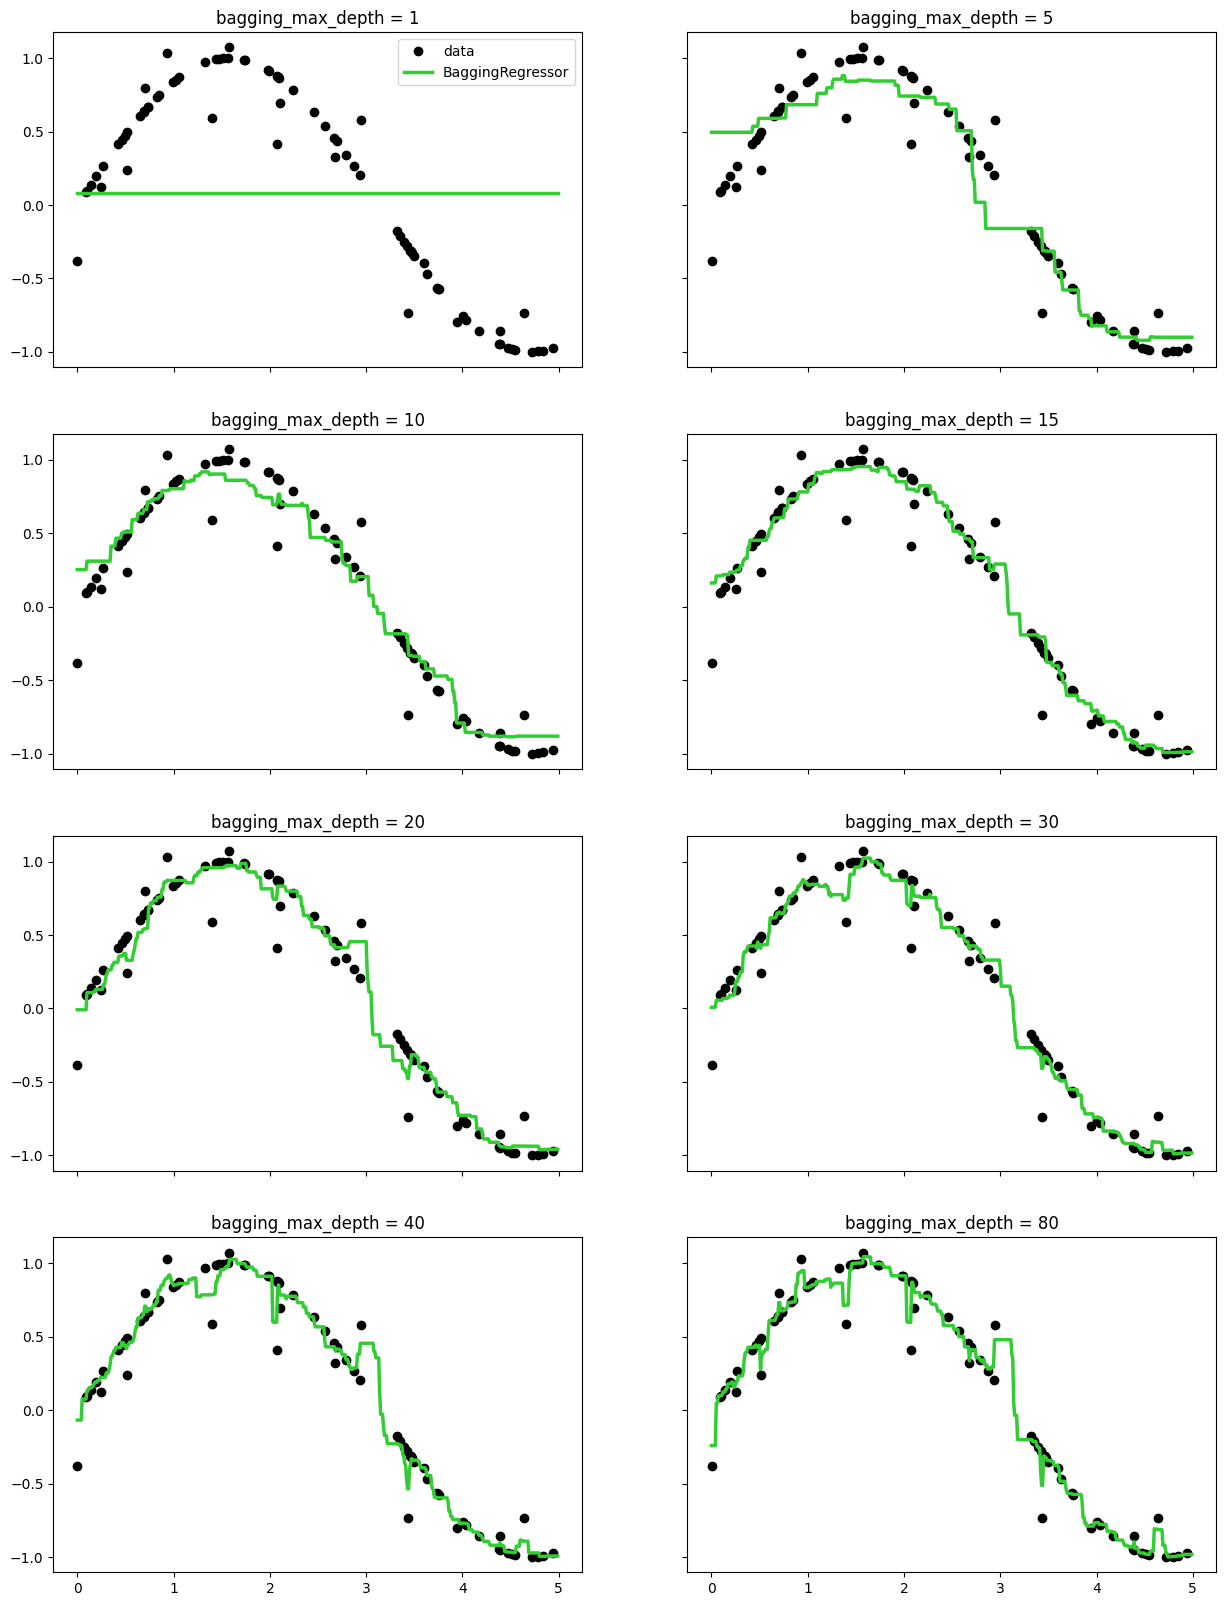

In [34]:
sample_depths = [1, 5, 10, 15, 20, 30, 40, len(X)]

# for plots
fig, axs = plt.subplots(int(len(sample_depths)/2), 2, facecolor='w', edgecolor='k', sharex='col', sharey='row', figsize=(15,20))

index = 0
for i in range(int(len(sample_depths)/2)): # test all max_sample
    for j in range(2):
        bagging = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=10), 
                                   n_estimators = 10, max_samples=sample_depths[index])
        bagging.fit(X, y)

        # predictions
        y_pred = bagging.predict(X_test)

        # plot everything
        axs[i][j].plot(X, y, 'o', c="k", label="data")
        axs[i][j].plot(X_test, y_pred, c=c_bagging_bt, linewidth=lw, label="BaggingRegressor")
        axs[i][j].set_title("bagging_max_depth = %d"%(sample_depths[index]))
        index += 1
        
axs[0][0].legend()   
plt.show()

Q3

/Users/salimatoutraore/opt/anaconda3/envs/mon_environnement/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/salimatoutraore/opt/anaconda3/envs/mon_environnement/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/salimatoutraore/opt/anaconda3/envs/mon_environnement/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/salimatoutraore/opt/anaconda3/envs/mon_environnement/lib/python3.11/site-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/salimatoutraore/opt/anaconda3/envs/mo

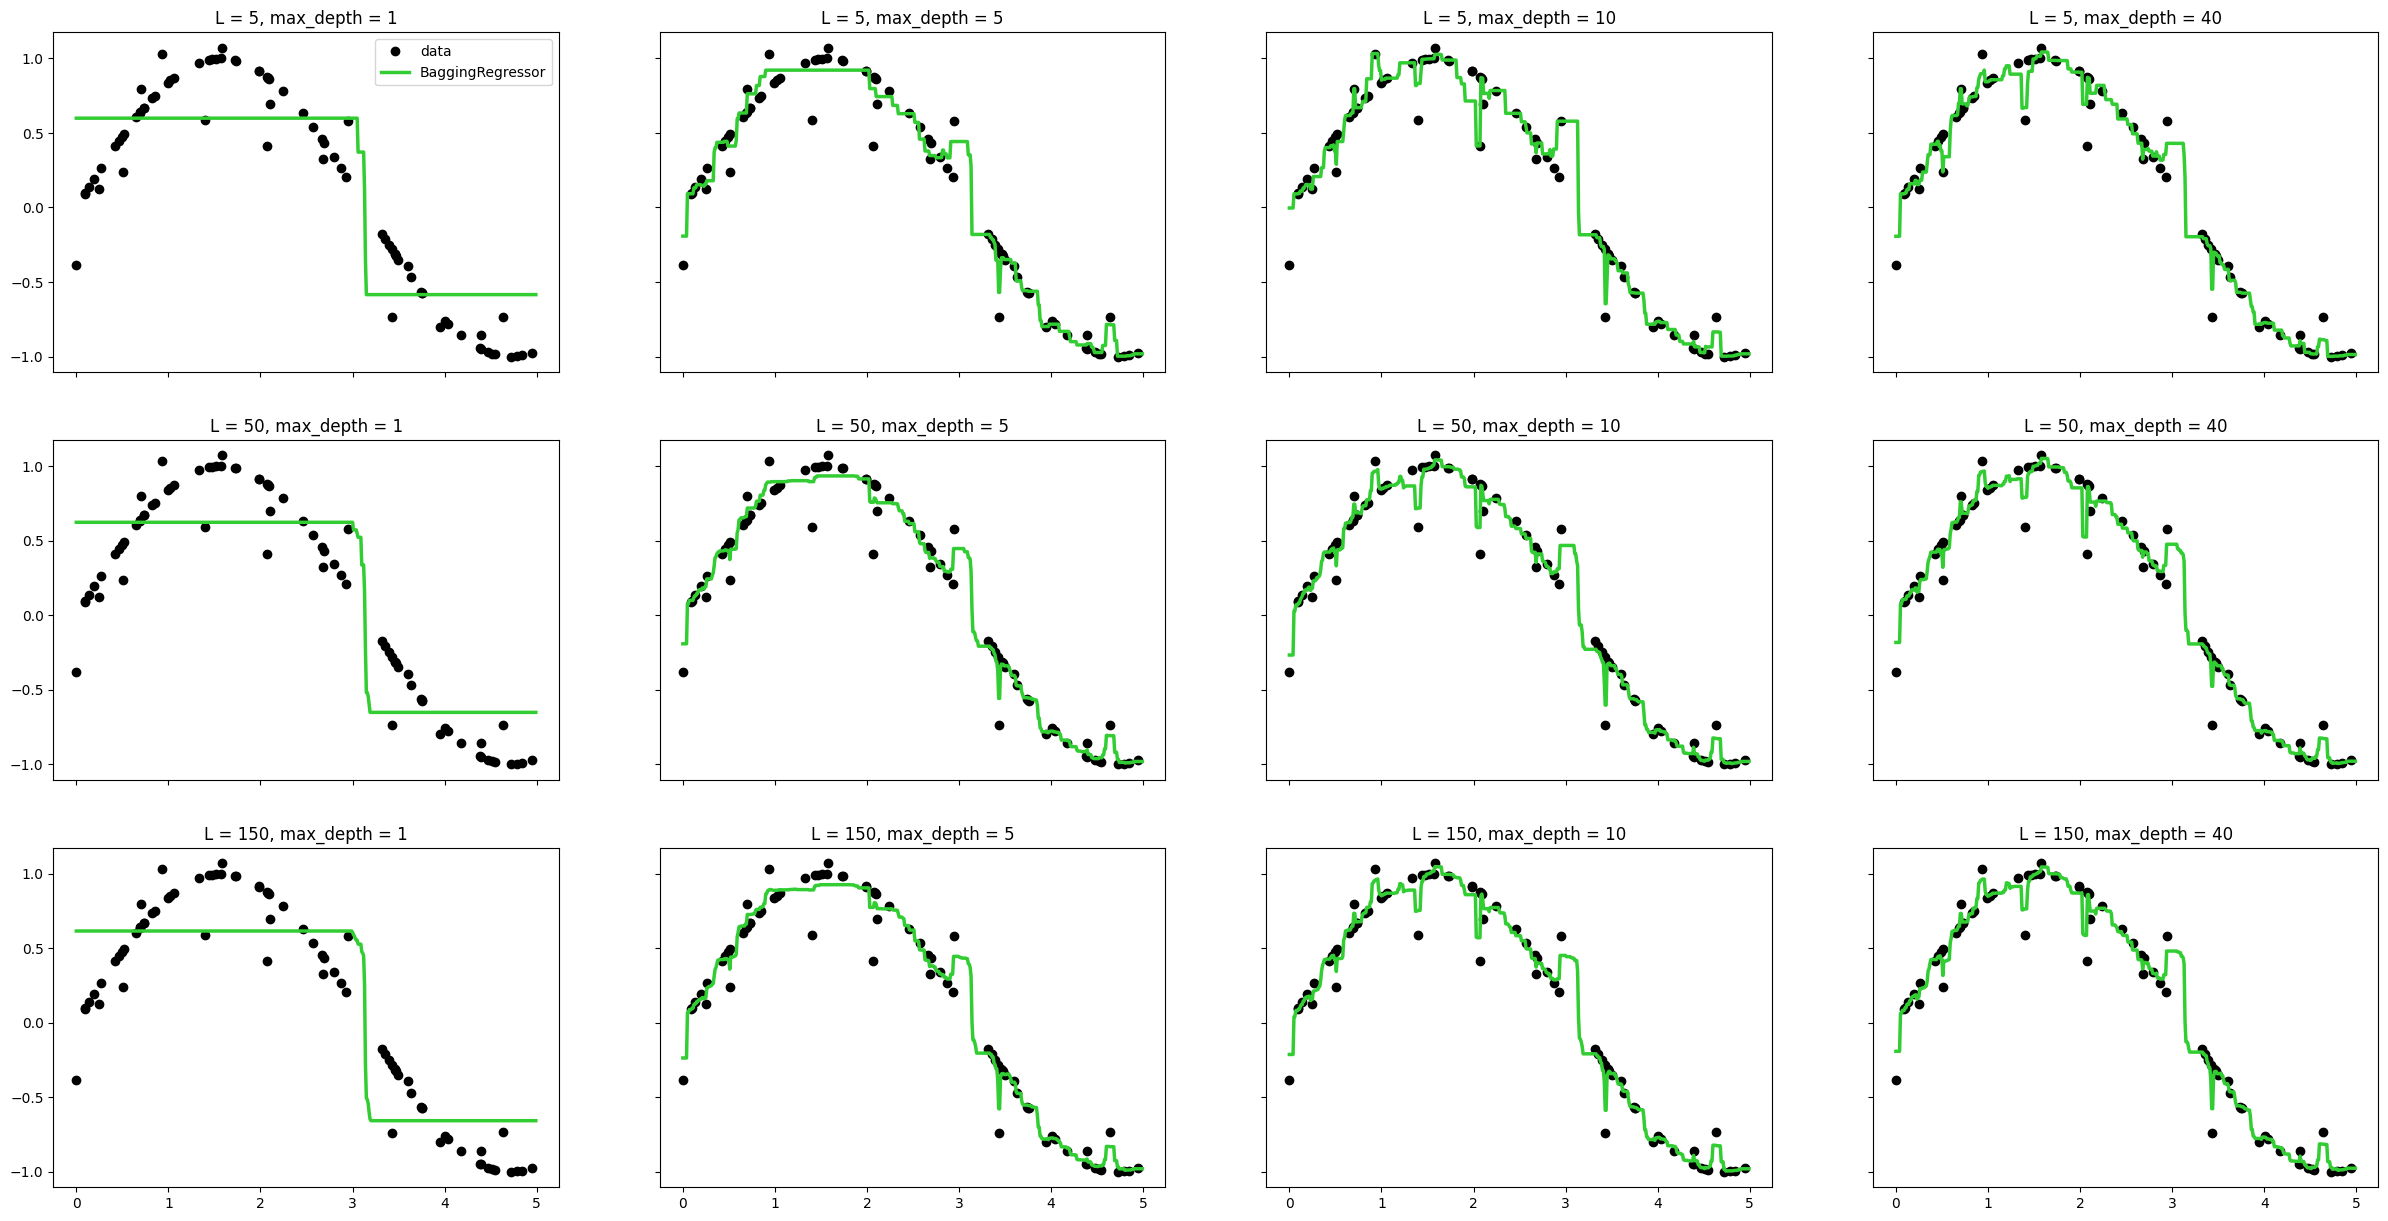

In [35]:
# The result we ideally expect to have
y_test = np.sin(X_test).ravel()

Ls = [5, 50, 150]
depths = [1, 5, 10, 40]

# Create a double loop for L and max_depth
scores = np.zeros((len(Ls), len(depths))) # create a matrix to store the scores. Rows = L, Columns = max_depth
baggings = [] # store the models

# for plots
fig, axs = plt.subplots(len(Ls), len(depths), facecolor='w', edgecolor='k', sharex='col', sharey='row', figsize=(30,15))

for i, l in enumerate(Ls, 0): # test all Ls
    #print("Setting L=%d" %l)
    for j, d in enumerate(depths, 0): # test all depths
        #print("    | Setting max_depth=%d" %d)
        bagging = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=d), 
                                   n_estimators = l)
        bagging.fit(X, y)
        scores[i, j] = bagging.score(X_test, y_test)
        baggings.append(bagging)
        
        # predictions
        y_pred = bagging.predict(X_test)
        
        # plot everything
        axs[i][j].plot(X, y, 'o', c="k", label="data")
        axs[i][j].plot(X_test, y_pred, c=c_bagging_bt, linewidth=lw, label="BaggingRegressor")
        axs[i][j].set_title("L = %d, max_depth = %d"%(l, d))
        
axs[0][0].legend()   
plt.show()

Q4

Q5

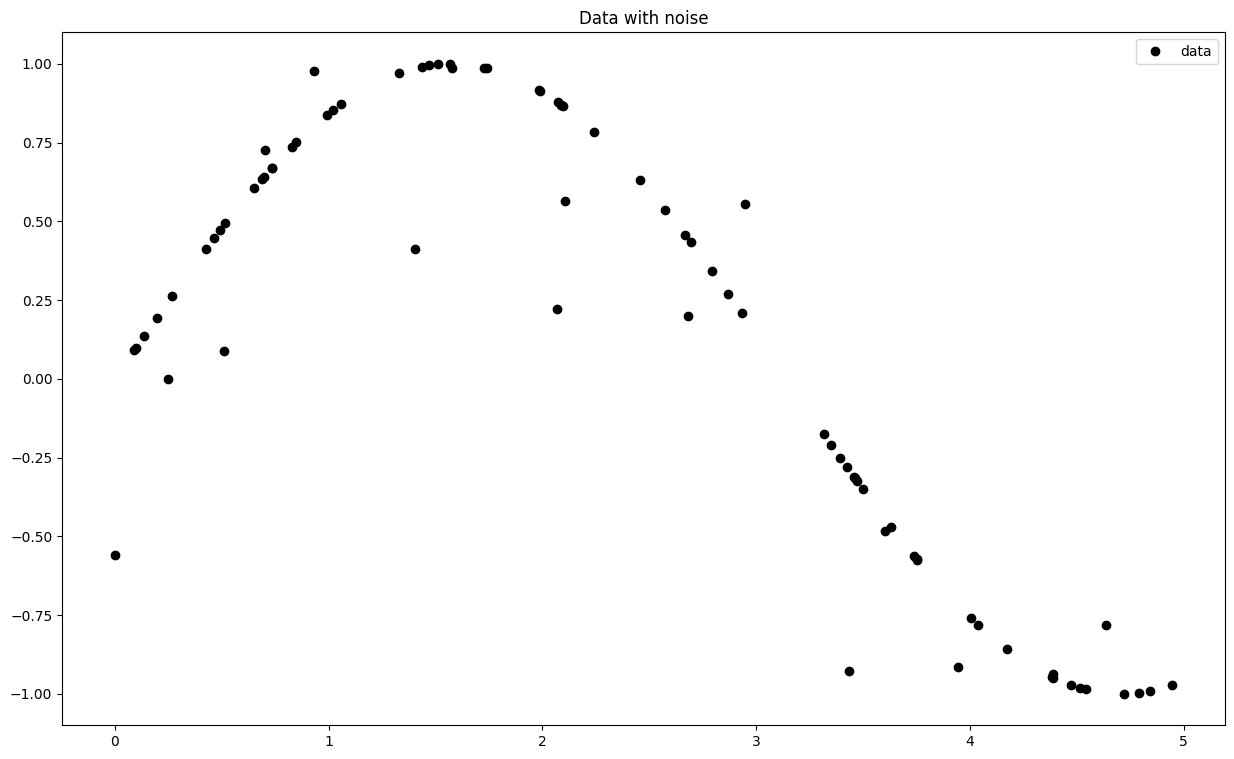

In [36]:
# Start with the random dataset again
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()

def generate_noise(X, s=0.5):
    y_noise = np.sin(X).ravel()
    y_noise[::5] += 1 * (0.5 - s*rng.rand(16))
    return y_noise

# Plot the results
y_noise = generate_noise(X, s=1.2)
plt.figure(figsize=(15, 9))
plt.plot(X, y_noise, 'o', c="k", label="data")

plt.title("Data with noise")
plt.legend(loc=1, numpoints=1)
plt.show()

In [37]:
# Create a noise list with different noise values
noise_list = np.arange(0.5, 2, 0.2)
noise_list

array([0.5, 0.7, 0.9, 1.1, 1.3, 1.5, 1.7, 1.9])

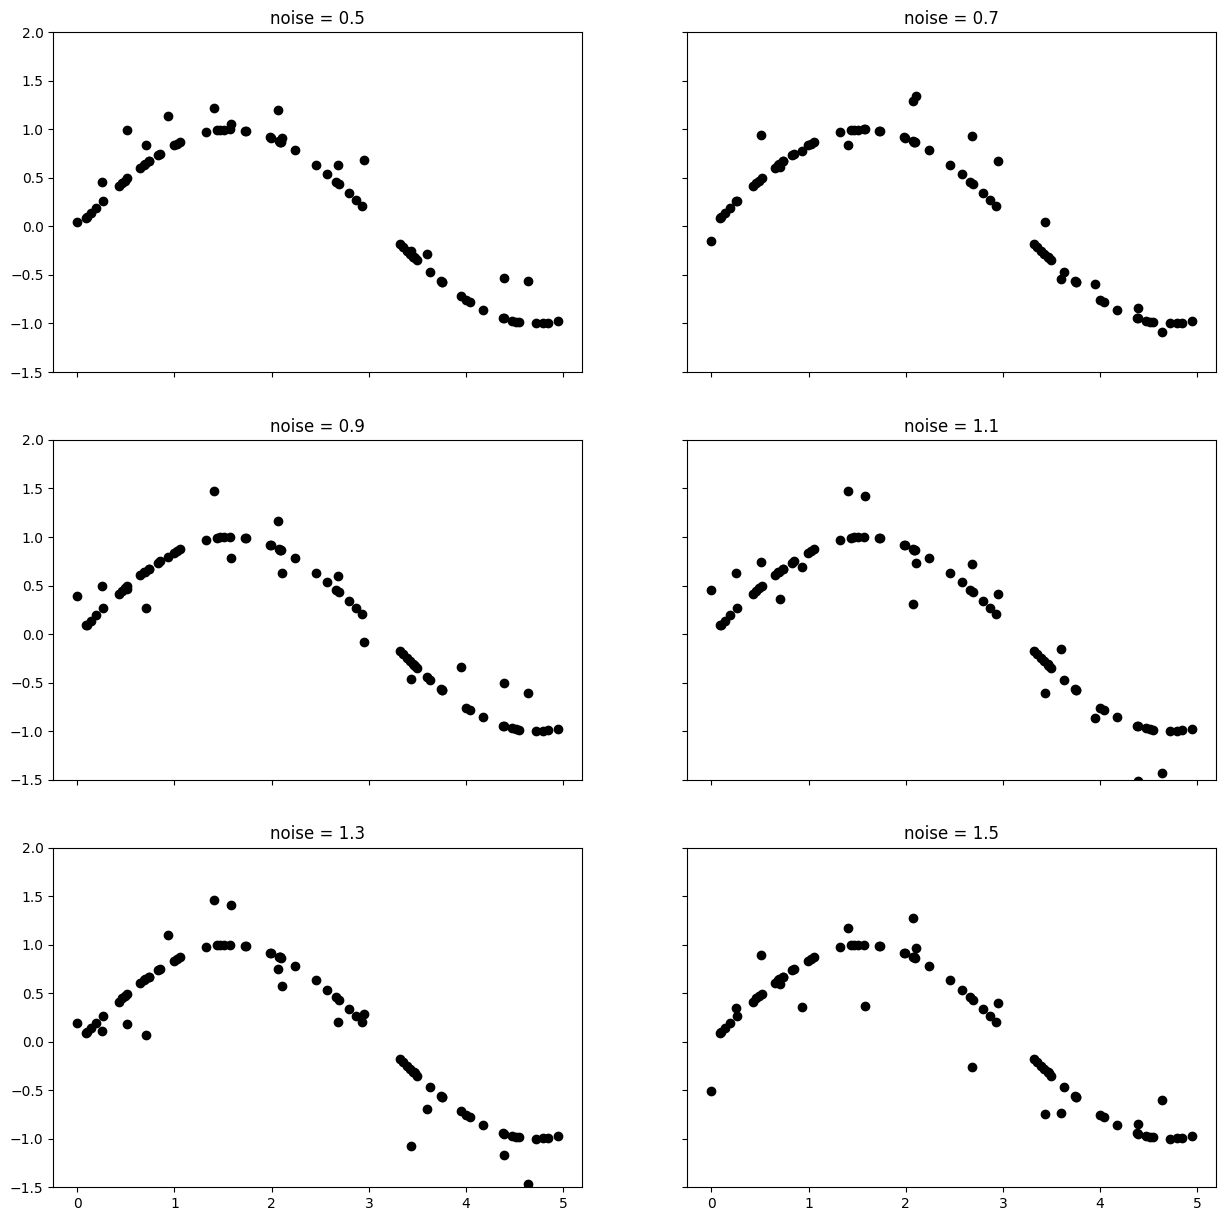

In [38]:
# Generate y with these noises
y_list = [generate_noise(X, s=n) for n in noise_list]

# Generate multiple data with noise
fig, axs = plt.subplots(3, 2, facecolor='w', edgecolor='k', sharex='col', sharey='row', figsize=(15,15))

noise = 0
for i in range(3):
    j= 0 
    for p in y_list[2*i:2*(i+1)]:
        axs[i][j].plot(X, p, 'o', c="k")
        axs[i][j].set_title("noise = %.1f" %noise_list[noise])
        axs[i][j].set_ylim(-1.5, 2.0)
        j += 1
        
        noise+=1

plt.show()

In [42]:
# Create a fitted tree for each y_noise
def fit_noise(X, y_list, max_depth=10):

    tree_noise = []

    for y in y_list:
        tree = DecisionTreeRegressor(max_depth=max_depth)
        tree.fit(X, y)
        tree_noise.append(tree)

    return tree_noise

tree_noise = fit_noise(X, y_list)

In [43]:
# Plot
def plot_noise(X, X_test, tree_noise, y_list):
    # 2 columns
    if (len(tree_noise) % 2 == 0):
        print("Number of plots : even")
        n_rows = int(len(tree_noise) / 2)
    else: 
        print("Number of plots : odd")
        n_rows = int(len(tree_noise) / 2) + 1
    print("Number of rows :", n_rows)
    
    fig, axs = plt.subplots(n_rows, 2, facecolor='w', edgecolor='k', sharex='col', sharey='row', figsize=(20, 20))
    
    noise = 0
    for i in range(n_rows):
        print("Line ", i)
        j = 0
        for tree in tree_noise[2*i:2*(i+1)]:
            axs[i][j].plot(X, y_list[noise], 'o', c="k")
            axs[i][j].plot(X_test, tree.predict(X_test), alpha=alp, color=c_tree, linewidth=lw)
            title = 'noise = %.1f (max_depth=%d)' %(noise_list[noise], tree.max_depth)
            axs[i][j].set_title(title)
            axs[i][j].set_ylim(-1.5, 2.0)
        
            j += 1
            noise += 1


    plt.show()

Number of plots : even
Number of rows : 4
Line  0
Line  1
Line  2
Line  3


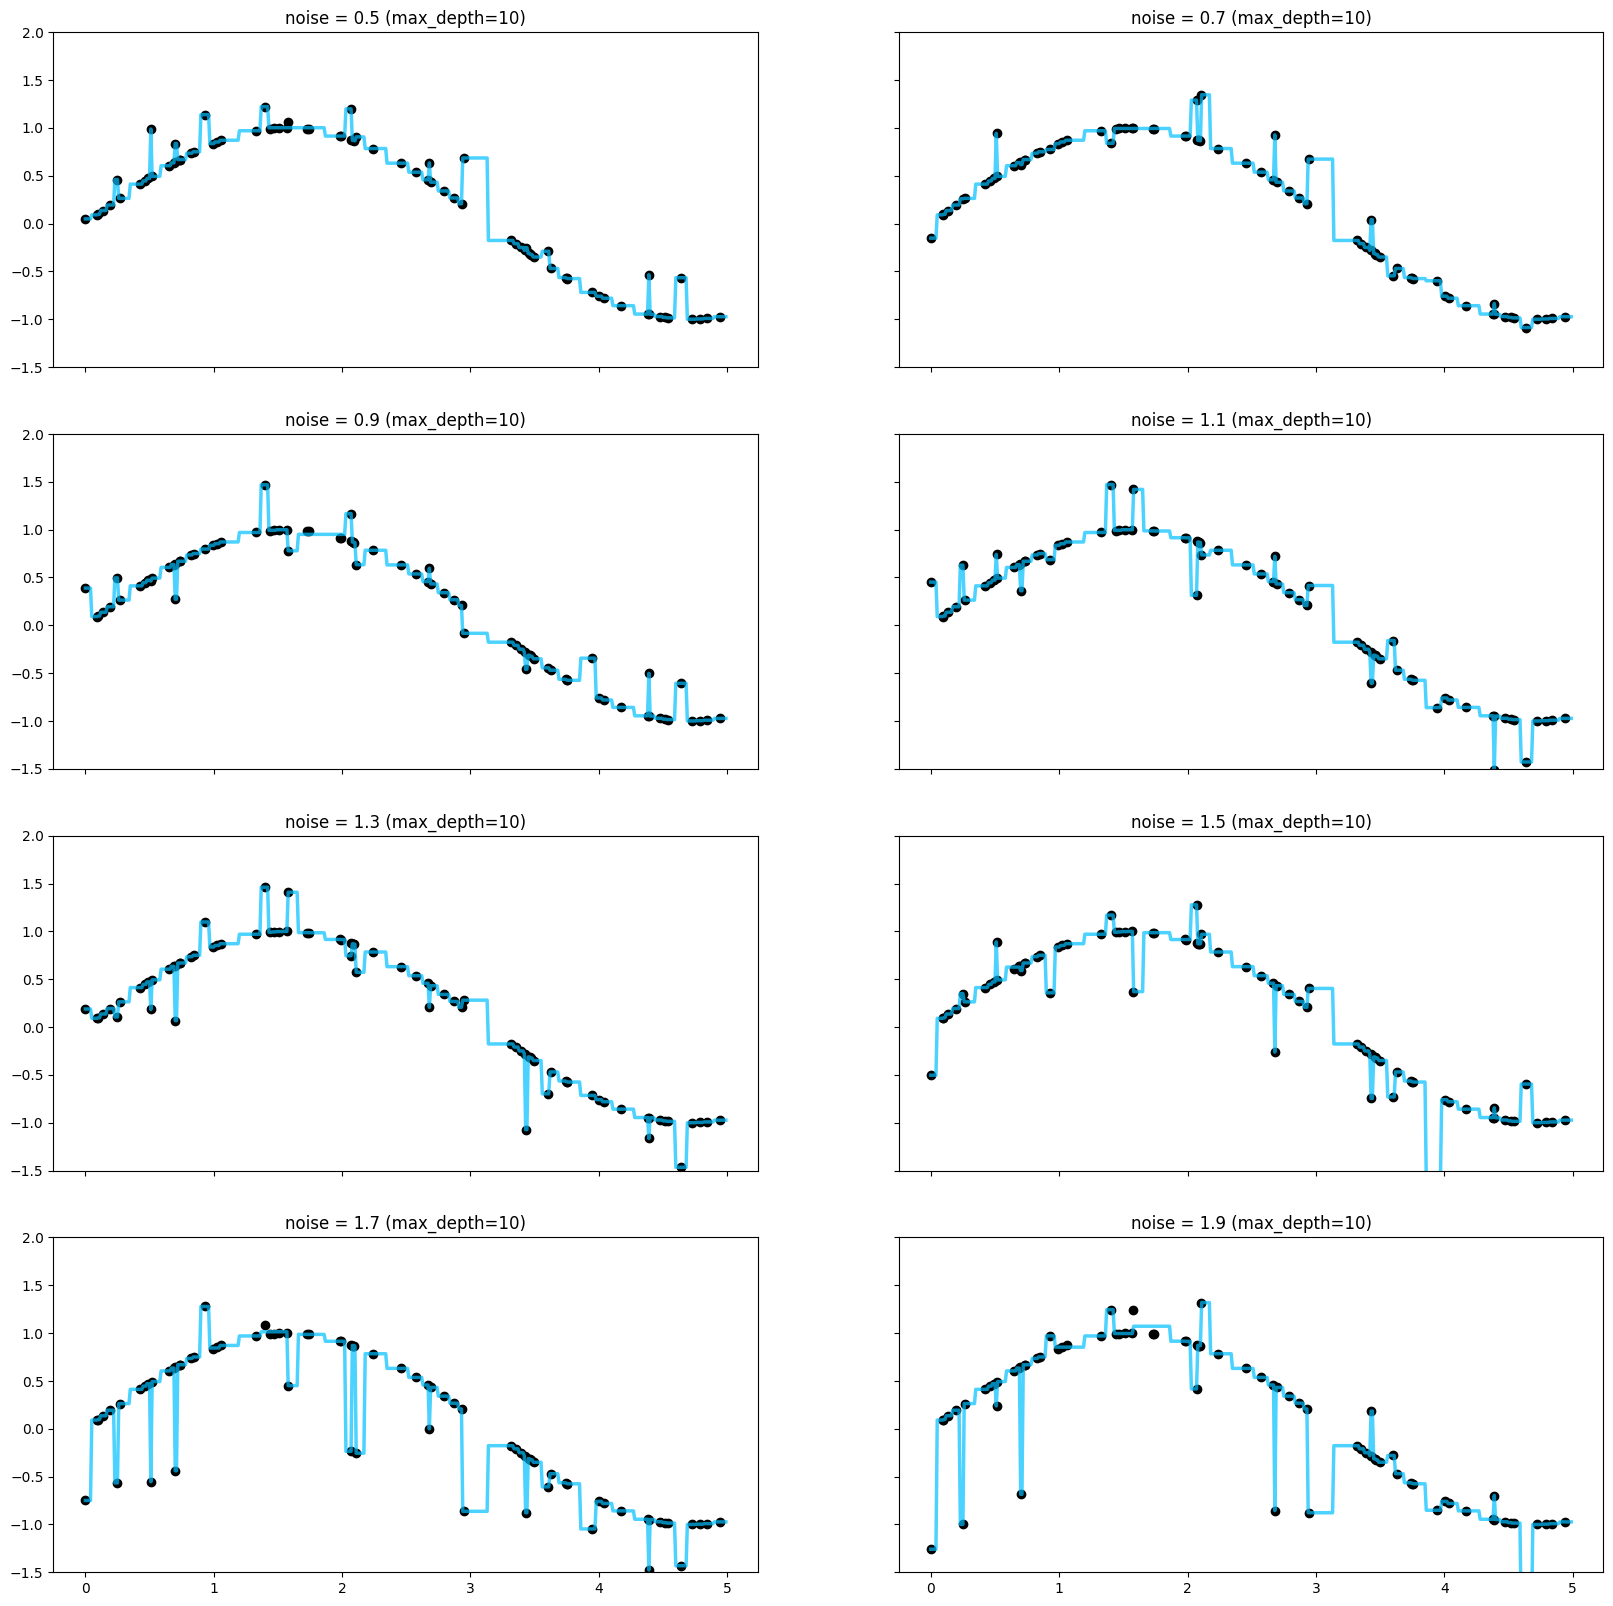

In [44]:
plot_noise(X, X_test, tree_noise, y_list)

Q7

In [52]:
for name, dataset in (
                      ('Diabetes', datasets.load_diabetes()),
                      ('Iris', datasets.load_iris()),
                      ('Digits', datasets.load_digits())
                      ):
    # Shuffle and rescale data
    X, y = shuffle(dataset.data, dataset.target, random_state=0)
    X = X.astype(np.float32)
    X -= X.mean(axis=0)
    X /= X.std(axis=0)
    X[np.isnan(X)] = 0.
    # Fit classification model
    params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2}
    if name == 'Iris' or name == 'Digits':
        rf = RandomForestClassifier(**params)
        svc = svm.SVC(C=1., kernel='linear')
    else:
        rf = RandomForestRegressor(**params)
        svc = svm.SVR(C=1., kernel='linear')
    print("-" * 5, name, "-" * 5)
    # Calculate the score
    for clf in (rf, svc):
        scores = cross_val_score(clf, X, y, cv=7)
        print(str(clf)[:25], '...', "%2.2f - %2.2f" % (scores.mean(),
                                                       scores.std()))

----- Diabetes -----
RandomForestRegressor(max ... 0.44 - 0.10
SVR(kernel='linear') ... 0.48 - 0.09
----- Iris -----
RandomForestClassifier(ma ... 0.97 - 0.04
SVC(kernel='linear') ... 0.95 - 0.05
----- Digits -----


/var/folders/cy/jxgrnlf57f78yz4v8gv0kn5h0000gn/T/ipykernel_80958/1248084606.py:10: RuntimeWarning: invalid value encountered in divide
  X /= X.std(axis=0)


RandomForestClassifier(ma ... 0.92 - 0.01
SVC(kernel='linear') ... 0.98 - 0.00


Q8

/var/folders/cy/jxgrnlf57f78yz4v8gv0kn5h0000gn/T/ipykernel_80958/4049472332.py:28: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[idx, 0], X[idx, 1], c=c, label=iris.target_names[i],


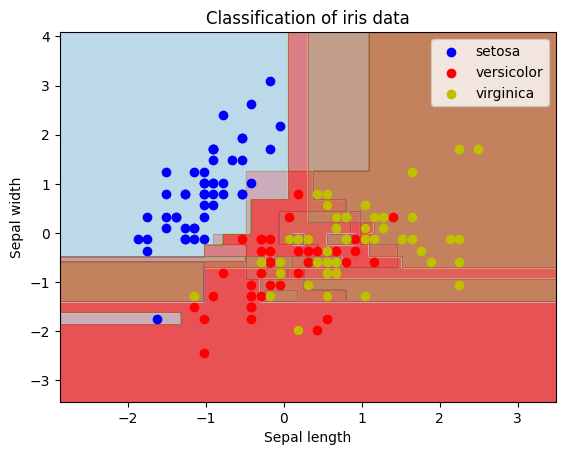

In [47]:
# Parameters
n_estimators = 2
plot_colors = "bry"
plot_step = 0.02
# Load data
iris = load_iris()
X_unscaled, y = iris.data[:, :2], iris.target
# Standardize
X = preprocessing.scale(X_unscaled)
# RF fitting
model = RandomForestClassifier(n_estimators=n_estimators)
clf = model.fit(X, y)
# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

plt.figure()
for tree in model.estimators_:
    Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, alpha=1. / n_estimators, cmap=plt.cm.Paired)
plt.axis("tight")
# Plot the training points
for i, c in zip(range(3), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=c, label=iris.target_names[i],
                cmap=plt.cm.Paired)
plt.legend(scatterpoints=1)
plt.title("Classification of iris data")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.show()

Q9

/var/folders/cy/jxgrnlf57f78yz4v8gv0kn5h0000gn/T/ipykernel_80958/3355676248.py:7: RuntimeWarning: invalid value encountered in divide
  X /= X.std(axis=0)


----- Digits -----
RandomForestClassifier() ... 0.976 - 0.007
DecisionTreeClassifier(max_depth=2) ... 0.317 - 0.007


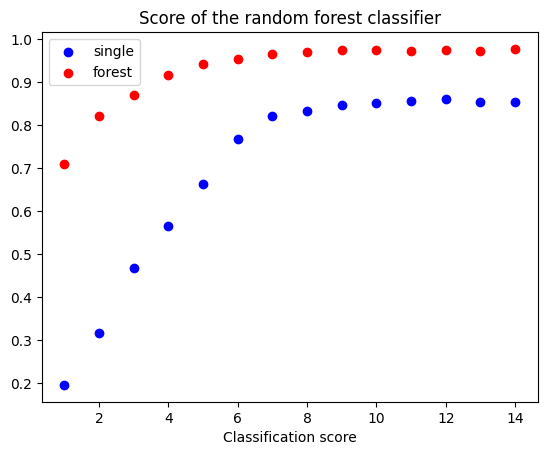

In [55]:
# Load data
dataset = datasets.load_digits()
# Shuffle and rescale data
X, y = shuffle(dataset.data, dataset.target, random_state=0)
X = X.astype(np.float32)
X -= X.mean(axis=0)
X /= X.std(axis=0)
X[np.isnan(X)] = 0.
# Fit classification model
params = {'n_estimators': 100, 'max_depth': None, 'min_samples_split': 2}
rf = RandomForestClassifier(**params)
rt = DecisionTreeClassifier(max_depth=2)
# Print scores
print("-" * 5, name, "-" * 5)
for clf in (rf, rt):
    scores = cross_val_score(clf, X, y, cv=6)
    print(str(clf)[:35], '...', "%2.3f - %2.3f" % (scores.mean(), scores.std()))

# Influence of depth on a single tree
depths = range(1, 15)
scores_rt = np.zeros(15)
scores_rf = np.zeros(15)
rt = DecisionTreeClassifier()
params = {'n_estimators': 100, 'max_depth': None, 'min_samples_split': 2}
rf = RandomForestClassifier(**params)
# Go through different depths
for i in depths:
    rt.set_params(max_depth=i)
    rf.set_params(max_depth=i)
    scores_rt[i - 1] = cross_val_score(rt, X, y, cv=6).mean()
    scores_rf[i - 1] = cross_val_score(rf, X, y, cv=6).mean()

plt.close()
plt.figure()
plt.title("Score of the random forest classifier")
plt.scatter(depths, scores_rt[:14], c='b', label="single")
plt.scatter(depths, scores_rf[:14], c='r', label="forest")
plt.xlabel("Depth of a tree")
plt.xlabel("Classification score")
plt.legend()